In [14]:
%matplotlib inline
import matplotlib as mpl
#mpl.use('Agg')
import numpy as np
import pylab as py
import matplotlib.cm as cm
from reverse_cmap import rcmap
import sys
import os
import errno
import netCDF4 as nc

BuRd = rcmap(cm.RdBu)

import hickle as hkl

## A function to save a dictionary ##
def save(filename,dictionary):
    hkl.dump(dictionary, filename, mode='w')

## A function to load a dictionary ## 
def load(filename):
    dictionary = hkl.load(filename)
    return dictionary

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise
####################
#### smoothening ###
####################

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

a=6371.0e3
R=a

py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')


In [15]:
import glob
import numpy as np
import scipy.io as sio
import pylab as py
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy import stats

#### Invoke all the files

m4 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la4m_oc4m/*.hkl'))
m5 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la5m_oc5m/*.hkl'))
m8 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la8m_oc8m/*.hkl'))
m10 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la10m_oc10m/*.hkl'))
m12 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la12m_oc12m/*.hkl'))
m16 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la16m_oc16m/*.hkl'))
m20 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la20m_oc20m/*.hkl'))
m30 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la30m_oc30m/*.hkl'))
m50 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la50m_oc50m/*.hkl'))
m80 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la80m_oc80m/*.hkl'))
m100 =(glob.glob('/project2/tas1/pragallva/Fall_quarter_2018/post_process_data/HC0_la100m_oc100m/*.hkl'))

In [30]:
# DEPTHS=[m5,HC10_50_5,HC20_50_5, HC30_50_5,m50,HC10_5_50, HC20_5_50,HC30_5_50]
DEPTHS=[m4, m5, m8, m10, m12, m16, m20, m30, m50, m80, m100]
depth_values=[4,   5,  8,  10,  12,  16,  20,  30,  50,  80,  100]
flux=[]
flux_vert=[]
div=[]
div_vert=[]
eke=[]
raw=[]
tsurf=[]
mmc_decomp=[]
mmc_decomp_vert=[]
c=5
coord=load(m5[c])
for depth in DEPTHS:
    f=0; e=1; mmcv=2; r=3; fv=4; c=5; d=6; dv=7; mmc=8;
    mmc_decomp.append(load(depth[mmc]))
    eke.append(load(depth[e]))
    mmc_decomp.append(load(depth[mmc]))
    mmc_decomp_vert.append(load(depth[mmcv]))
    raw.append(load(depth[r]))
    flux.append(load(depth[f]))
    flux_vert.append(load(depth[fv]))
    div.append(load(depth[d])) 
    div_vert.append(load(depth[dv]))

In [31]:
depth_values=[4,   5,  8,  10,  12,  16,  20,  30,  50,  80,  100]

In [32]:
mmc_5  = (glob.glob('/project2/tas1/pragallva/Winter_quarter_2019/post_process_data/isca/HC0_la5m_oc5m/*.hkl'))
mmc_50 = (glob.glob('/project2/tas1/pragallva/Winter_quarter_2019/post_process_data/isca/HC0_la50m_oc50m/*.hkl'))

In [35]:
mmc_5

['/project2/tas1/pragallva/Winter_quarter_2019/post_process_data/isca/HC0_la5m_oc5m/mmc_decompose_vert_interp.hkl',
 '/project2/tas1/pragallva/Winter_quarter_2019/post_process_data/isca/HC0_la5m_oc5m/mmc_decompose_interp.hkl']

In [36]:
mmc_decomp_2=[]
mmc_decomp_vert_2=[]
mmc_depths=[mmc_5,mmc_50]
for depth in mmc_depths:
    mmcv=0; mmc=1;
    mmc_decomp_2.append(load(depth[mmc]))
    mmc_decomp_vert_2.append(load(depth[mmcv]))


In [37]:
lat=div[0]['latn']
def M(X):
    #X=X-X.mean(axis=0)[None,:]
    return X

In [38]:
import scipy.integrate as integrate
def interad(x):
    l=np.deg2rad(lat[:,None])
    x=x*np.cos(l)
    #int_x  =integrate.cumtrapz(x[::-1,:],l[::-1],axis=0,initial=None) #  (This is basically integration from - 90 deg)
    int_x_r=integrate.cumtrapz(x        ,l      ,axis=0,initial=None) #  (This is basically integration from + 90 deg) 
    avg_int_r=2*np.pi*a**2*(int_x_r[:])#int_x_r[:-1,:]) #int_x[::-1,:][1:,:]+
    return avg_int_r/10**15

# Save temperature and other vertical fields

In [39]:
T=[]; Q=[]; U=[]; V=[]; Z=[]; EKE=[]; EMF=[];
MMv=[]; SEv=[]; NEv=[]; TEv=[];
divMMv=[]; divSEv=[]; divNEv=[]; divTEv=[];

del_m_mmc=[]; del_v_mmc=[];
del_m_mmc_vert=[]; del_v_mmc_vert=[];
del_mv_mmc_vert=[];

del_m_mmc_2=[]; del_v_mmc_2=[]; del_mv_mmc_2=[];
del_m_mmc_vert_2=[]; del_v_mmc_vert_2=[]; del_mv_mmc_vert_2=[];
MM_flux_2=[]; MM_flux_vert_2=[]


for depth in range(len(DEPTHS)):
    T.append(M(raw[depth]['T']))
    Q.append(M(raw[depth]['q']))
    U.append(M(raw[depth]['U']))
    V.append(M(raw[depth]['V']))
    Z.append(M(raw[depth]['Z']))
    EKE.append(M(eke[depth]['EKE']))
    EMF.append(M(eke[depth]['EMF']))
    
    MMv.append(M(flux_vert[depth]['MM']))
    SEv.append(M(flux_vert[depth]['SE']))
    TEv.append(M(flux_vert[depth]['TE']))
    NEv.append(M(flux_vert[depth]['NE']))
        
    divMMv.append(M(div_vert[depth]['MM']))
    divSEv.append(M(div_vert[depth]['SE']))
    divTEv.append(M(div_vert[depth]['TE']))
    divNEv.append(M(div_vert[depth]['NE']))
    
#     del_m_mmc.append(M(mmc_decomp[depth]['del_m_mmc']))
#     del_v_mmc.append(M(mmc_decomp[depth]['del_v_mmc']))
    
#     del_m_mmc_vert.append(M(mmc_decomp_vert[depth]['del_m_mmc']))
#     del_v_mmc_vert.append(M(mmc_decomp_vert[depth]['del_v_mmc']))
    
    
for depth in range(len(mmc_depths)):
    
    MM_flux_2.append(M(mmc_decomp_2[depth]['MM_flux']))
    del_m_mmc_2.append(M(mmc_decomp_2[depth]['del_m_mmc']))
    del_v_mmc_2.append(M(mmc_decomp_2[depth]['del_v_mmc']))
    del_mv_mmc_2.append(M(mmc_decomp_2[depth]['del_mv_mmc']))

    MM_flux_vert_2.append(M(mmc_decomp_vert_2[depth]['MM_flux']))
    del_m_mmc_vert_2.append(M(mmc_decomp_vert_2[depth]['del_m_mmc']))
    del_v_mmc_vert_2.append(M(mmc_decomp_vert_2[depth]['del_v_mmc']))
    del_mv_mmc_vert_2.append(M(mmc_decomp_vert_2[depth]['del_mv_mmc']))

    
T=np.array(T); U=np.array(U); V=np.array(V); Z=np.array(Z); Q=np.array(Q); EKE=np.array(EKE); EMF= np.array(EMF)
MMv=np.array(MMv); SEv=np.array(SEv); TEv=np.array(TEv); NEv=np.array(NEv);
divMMv=np.array(divMMv); divSEv=np.array(divSEv); divTEv=np.array(divTEv); divNEv=np.array(divNEv);


KeyError: 'NE'

In [29]:
mmc_decomp[4].keys()

['MM', 'TE', 'NE', 'SE']

In [22]:
TE=[]; MM=[]; SE=[]; INE=[]; EKE_vert=[]; EMF_vert=[]; 
for depth in range(len(DEPTHS)):
    TE.append(M(flux[depth]['TE']))
    SE.append(M(flux[depth]['SE']))
    MM.append(M(flux[depth]['MM']))
    INE.append(TE[depth]+SE[depth]+MM[depth])

In [23]:
div_TE=[]; div_MM=[]; div_SE=[]; div_NE=[];
swabs=[]; shf=[]; olr=[];dhdt=[];ne=[];
SW_sfc=[]; SW_toa=[]; LW_sfc=[]; shflx=[]; lhflx=[]; sfc=[]; toa=[]

for depth in range(len(DEPTHS)):
    div_TE.append(div[depth]['TE'])
    div_SE.append(div[depth]['SE'])
    div_MM.append(div[depth]['MM'])
    div_NE.append(div_TE[depth]+div_SE[depth]+div_MM[depth])
    
    swabs.append(div[depth]['SWABS'])
    shf.append(div[depth]['SHF'])
    dhdt.append(div[depth]['dhdt'])
    olr.append(div[depth]['olr'])
    ne.append(swabs[depth]+shf[depth]-olr[depth]-dhdt[depth])
    
    SW_sfc.append(-1*div[depth]['SW_sfc_d'])
    LW_sfc.append(-1*div[depth]['LW_sfc_d'])
    SW_toa.append(div[depth]['SW_toa_d'])
    shflx.append(div[depth]['shflx_u'])
    lhflx.append(div[depth]['lhflx_u'])
    sfc.append(div[depth]['SFC_u'])
    toa.append(div[depth]['TOA_d'])
    

In [24]:
def M(x):
    return np.array(x)
lat=div[0]['latn']
Iswabs=[]; Ishf=[]; Idhdt=[]; Iolr=[]; Ine=[];
ISW_sfc=[]; ISW_toa=[]; ILW_sfc=[]; Ishflx=[]; Ilhflx=[]; ISFC=[]; ITOA=[]; TS=[]; precip=[]
for depth in range(len(DEPTHS)):
    Iswabs.append(M(flux[depth]['SWABS']))
    Ishf.append(M(flux[depth]['SHF']))
    Idhdt.append(M(flux[depth]['dhdt']))
    Iolr.append(M(flux[depth]['olr']))
    ISW_sfc.append(-1*M(flux[depth]['SW_sfc_d'])) ## up
    ILW_sfc.append(M(-1*flux[depth]['LW_sfc_d'])) ## up
    ISW_toa.append(M(flux[depth]['SW_toa_d']))    ## dn
    Ishflx.append(M(flux[depth]['shflx_u']))      ## up
    Ilhflx.append(M(flux[depth]['lhflx_u']))      ## up
    
    ISFC.append(M(flux[depth]['SFC_u']))
    ITOA.append(M(flux[depth]['TOA_d']))
    Ine.append(Iswabs[depth]+Ishf[depth]-Iolr[depth]-Idhdt[depth])

In [77]:
TE=np.array(TE); SE=np.array(SE); MM=np.array(MM); NE=np.array(INE); EKE_vert=np.array(EKE_vert); EMF_vert=np.array(EMF_vert)
Iswabs=np.array(Iswabs); Ishf=np.array(Ishf); Ine=np.array(Ine); Iolr=np.array(Iolr); Idhdt=np.array(Idhdt);
ISW_sfc=np.array(ISW_sfc); ILW_sfc=np.array(ILW_sfc); ISW_toa=np.array(ISW_toa); Ishflx=np.array(Ishflx); Ilhflx=np.array(Ilhflx);
ISFC=np.array(ISFC); ITOA=np.array(ITOA); 
del_m_mmc=np.array(del_m_mmc); del_v_mmc=np.array(del_v_mmc)
MM_flux_2 =np.array(MM_flux_2)
del_m_mmc_2=np.array(del_m_mmc_2)
del_v_mmc_2=np.array(del_v_mmc_2)
del_mv_mmc_2=np.array(del_mv_mmc_2)
MM_flux_vert_2=np.array(MM_flux_vert_2)
del_v_mmc_vert_2=np.array(del_v_mmc_vert_2)
del_m_mmc_vert_2=np.array(del_m_mmc_vert_2)
del_mv_mmc_vert_2=np.array(del_mv_mmc_vert_2)
nl_mean      = del_mv_mmc_2.mean(axis=-1)[...,None]
nl_mean_vert = del_mv_mmc_vert_2.mean(axis=-1)[...,None]



#     MM_flux_2.append(M(mmc_decomp_2[depth]['MM_flux']))
#     del_m_mmc_2.append(M(mmc_decomp_2[depth]['del_m_mmc']))
#     del_v_mmc_2.append(M(mmc_decomp_2[depth]['del_v_mmc']))
#     del_p_mmc_2.append(M(mmc_decomp_2[depth]['del_p_mmc']))
#     nl1_mmc_2.append(M(mmc_decomp_2[depth]['nl1_mmc']))
#     nl2_mmc_2.append(M(mmc_decomp_2[depth]['nl2_mmc']))


In [27]:
MM_flux_vert_2.shape

(2, 1741, 40, 12)

# Average Northern and Southern Hemispheres

In [28]:
def N_S_avg(TE, SE, MM, NE, temp, lat, flux_flag=-1):
    l_N=((lat>-0.1) & (lat<=90))            
    l_S=((lat>=-90) & (lat<=0))
    
    avg = lambda x: (x[:,l_N,...]+flux_flag*np.roll(x[:,l_S,...][:,::-1,...], 6, axis=-1))/2.0
    
    TE1= avg(TE)
    SE1= avg(SE)
    NE1= avg(NE)
    MM1= avg(MM)
    temp= avg(temp)
    
    a= lambda x: np.append(x,x[...,0,None],axis=-1)
    
    return a(TE1), a(SE1), a(MM1), a(NE1), a(temp), lat[l_N]

In [34]:
del_mv_mmc_vert_2.shape

(2, 1741, 40, 12)

In [92]:
TE_a   ,SE_a     , MM_a  , NE_a  , NE_a,   lat_a  = N_S_avg(TE, SE, MM, NE, NE, lat)
Iswabs_a,Ishf_a  , Ine_a , Iolr_a, Idhdt_a, latr_a = N_S_avg( Iswabs,Ishf,Ine,Iolr,Idhdt, lat[1:-1] )
ISW_sfc_a, ILW_sfc_a  , ISW_toa_a , Ishflx_a, Ilhflx_a, latr_a = N_S_avg( ISW_sfc,ILW_sfc,ISW_toa, Ishflx, Ilhflx, lat[1:-1] )
ISFC_a = N_S_avg( ISFC,ISFC,ISFC,ISFC,ISFC, lat[1:-1] )[0]
ITOA_a = N_S_avg( ITOA,ITOA,ITOA,ITOA,ITOA, lat[1:-1] )[0] 
del_v_mmc_a, del_m_mmc_a = N_S_avg( del_v_mmc, del_m_mmc, nl_mean, nl_mean_vert, del_v_mmc, lat )[0:2]
del_v_mmc_2_a, del_m_mmc_2_a, del_mv_mmc_2_a = N_S_avg( del_v_mmc_2, del_m_mmc_2, del_mv_mmc_2, del_mv_mmc_2, del_mv_mmc_2, lat )[0:3]
del_v_mmc_vert_2_a, del_m_mmc_vert_2_a, del_mv_mmc_vert_2_a, MM_flux_vert_2_a, MM_flux_2_a = N_S_avg( del_v_mmc_vert_2, del_m_mmc_vert_2, del_mv_mmc_vert_2, MM_flux_vert_2, MM_flux_2, lat )[0:5]

nl_mean_a        = del_mv_mmc_2_a[:-1].mean(axis=-1)[...,None]
nl_mean_vert_a   = del_mv_mmc_vert_2_a[:-1].mean(axis=-1)[...,None]


In [79]:
del_m_mmc_vert_2.shape

(2, 1741, 40, 12)

In [80]:
dtheta=np.radians(lat_a[1]-lat_a[0])

def spher_div(x,fac=1):
       N=100
#        fac=1 #np.cos(np.radians(lat))
       div=np.copy(x)
       for d in range(len(DEPTHS)):
        for m in range(13):
           div[d,:,m]= smooth( np.gradient((x[d,:,m])*(fac),dtheta)/( 2*np.pi*R**2*np.cos(np.radians(lat_a[:])) ),N)
       return div

div_TE_a=spher_div(TE_a*10**15)
div_SE_a=spher_div(SE_a*10**15)
div_MM_a=spher_div(MM_a*10**15)
div_NE_a=div_TE_a+div_SE_a+div_MM_a

In [81]:
lat=div[0]['latn']

from scipy.interpolate import interp1d

def find_zero(div):
  zero_loc = np.zeros((len(DEPTHS),13))
  for d in range(0,len(DEPTHS)):
      for m in range(0,13):
            l_range=((lat_a>=30) & (lat_a<=60))            
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc

storm_pos=find_zero(div_TE_a)

In [82]:
sigma= 5.670367e-8 ## Stefan's constant
Rd=286.9 # J/Kg
Rv=461.5 # J/kg
Cp= 1004.64 # J/kg/deg
g= 9.8
L=2.500e6 # J/kg
a=6371.0e3  ## m
CpT=Cp*T
Lq =L*Q
gZ =g*Z

In [83]:
from scipy.interpolate import interp1d

def interpolate_pressure(div):
  interp_pres = np.zeros((1741,41,12))
  for p in range(0,41):
      for m in range(0,12):
            interpolation_function = interp1d(coord['lat'],div[m,p,:],kind='cubic')
            interp_pres[:,p,m]     =interpolation_function(lat)      
  return interp_pres

# pressure=interpolate_pressure(ps)

In [84]:
def plot_flux(de,field) :
    
    de_values=np.array(depth_values)
    d=np.squeeze(np.where((de_values)==de))
    depth=de_values[d]
    

    mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),0)
    def add(y):
       y1 = y#np.append(y,y[:,0,np.newaxis],axis=1)
       y= np.roll(y,0,axis=-1)  
       return y
    
    def a(y):
       y1 = y#np.append(y,y[0])
       return y1 
    
    v = np.arange(-20.0, 22.0, 2)
    lat=lat_a

    b = py.contourf(range(13),lat,add(field[d,...]), v,cmap=BuRd); #py.colorbar()
    c=py.contour(range(13),lat, add(field[d,...]), v,colors='k',linewidths=1.0);
    py.clabel(c,  inline=1,fmt = '%d',inline_spacing=40, fontsize=20)
    py.ylabel("latitude",fontsize=37)
    py.xticks(range(13), (mticks),fontsize=25)
    py.yticks(range(0,81,20),fontsize=32)
    py.tick_params(labelsize=32,size=4,width=2)
    py.title(str(depths[d])+' m',fontsize=30)
    py.xticks(range(13), (mticks),fontsize=25)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)
#     py.ylim(0,80)

### $\langle\left(\Delta\left[\bar{v}\right]\right)\left[\bar{m}\right]_{o}\rangle$,  $\langle\left[\bar{v}\right]_{o}\Delta\left(\left[\bar{m}\right]\right)\rangle$,  $\Delta\langle\left[\bar{v}\right]\left[\bar{m}\right]\rangle$


In [163]:
def plot_flux2(de,field) :
    
    de_values=np.array([5,50])
    d=np.squeeze(np.where((de_values)==de))
    depth=de_values[d]
    

    mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),0)
    def add(y):
       y1 = y#np.append(y,y[:,0,np.newaxis],axis=1)
       y= np.roll(y,0,axis=-1)  
       return y
    
    def a(y):
       y1 = y#np.append(y,y[0])
       return y1 
    
    v = np.arange(-20.0, 22.0, 2)
    #=lat

    b = py.contourf(range(13),lat_a,add(field[d,...]), v,cmap=BuRd); #py.colorbar()
    c=py.contour(range(13),lat_a, add(field[d,...]), v,colors='k',linewidths=1.0);
    py.clabel(c,  inline=1,fmt = '%d',inline_spacing=20, fontsize=12)
    py.ylabel("latitude",fontsize=18)
    py.xticks(range(13), (mticks),fontsize=18)
    py.yticks(range(0,81,20),fontsize=18)
    py.tick_params(labelsize=22,size=4,width=2)
#     py.title(str(depths[d])+' m',fontsize=30)
    py.xticks(range(13), (mticks),fontsize=18)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)


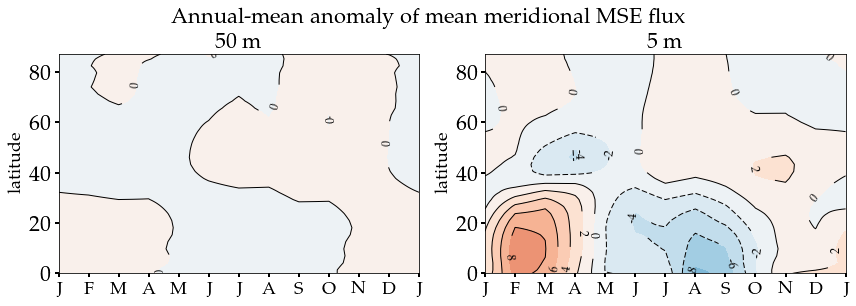

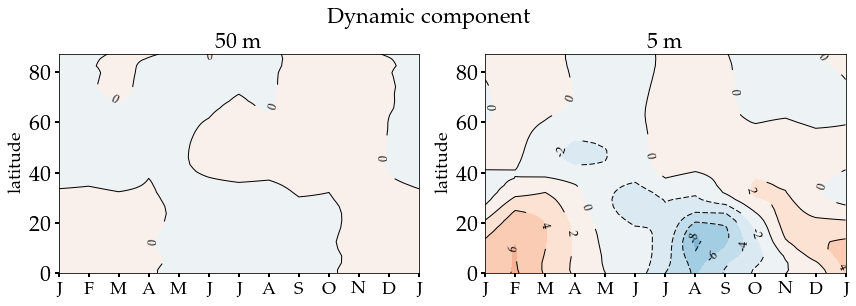

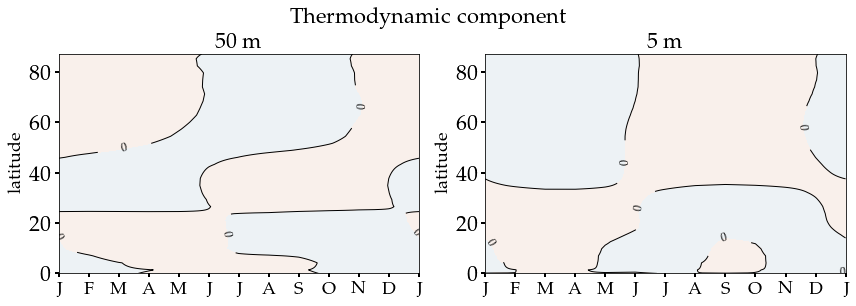

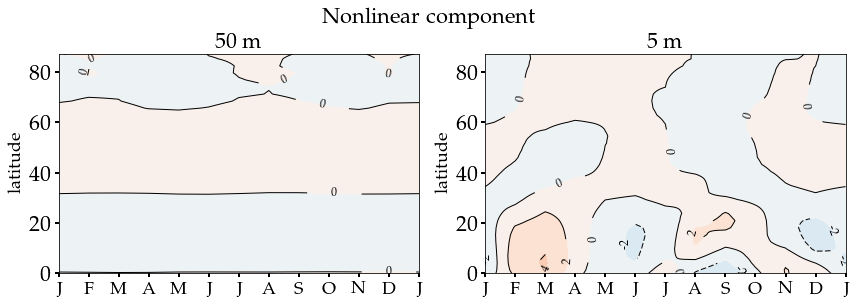

In [176]:
fig=py.figure(figsize=(12, 4))
depths2=[5,50]

field=MM_flux_2_a-MM_flux_2_a[...,:-1].mean(axis=-1)[...,None]; i=0
for d in [50,5]:
    i=i+1
    py.subplot(1,2,i)
    plot_flux2(d,field)
    py.title(str(d)+' m',fontsize=22)
py.suptitle("Annual-mean anomaly of mean meridional MSE flux",fontsize=22, y=1.05)
py.tight_layout()
py.savefig('Jan25/Appendix_MMC_change.pdf',bbox_inches="tight")

fig=py.figure(figsize=(12, 4))
field=del_v_mmc_2_a; i=0
i=0;
for d in [50,5]:
    i=i+1
    py.subplot(1,2,i)
    plot_flux2(d,field)
    py.title(str(d)+' m',fontsize=22)
py.suptitle('Dynamic component ',fontsize=22, y=1.05)
py.tight_layout()
py.savefig('Jan25/Appendix_dynamic.pdf',bbox_inches="tight")


fig=py.figure(figsize=(12, 4))
field=(del_m_mmc_2_a); i=0
for d in [50,5]:
    i=i+1
    py.subplot(1,2,i)
    plot_flux2(d,field)
    py.title(str(d)+' m',fontsize=22)
py.suptitle('Thermodynamic component ',fontsize=22, y=1.05)
py.tight_layout()
py.savefig('Jan25/Appendix_thermodynamic.pdf',bbox_inches="tight")


fig=py.figure(figsize=(12, 4))
field=(del_mv_mmc_2_a-nl_mean_a); i=0
for d in [50,5]:
    i=i+1
    py.subplot(1,2,i)
    plot_flux2(d,field)
    py.title(str(d)+' m',fontsize=22)
py.suptitle('Nonlinear component ',fontsize=22, y=1.05)
py.tight_layout()
py.savefig('Jan25/Appendix_nonlinear_mmc.pdf',bbox_inches="tight")


In [175]:
# def plot_flux2(de,field) :
    
#     de_values=np.array([5,50])
#     d=np.squeeze(np.where((de_values)==de))
#     depth=de_values[d]
    

#     mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),0)
#     def add(y):
#        y1 = y#np.append(y,y[:,0,np.newaxis],axis=1)
#        y= np.roll(y,0,axis=-1)  
#        return y
    
#     def a(y):
#        y1 = y#np.append(y,y[0])
#        return y1 
    
#     v = np.arange(-20.0, 22.0, 2.0)
#     #=lat

#     b = py.contourf(range(12),lat,add(field[d,...]), v,cmap=BuRd); #py.colorbar()
#     c=py.contour(range(12),lat, add(field[d,...]), v,colors='k',linewidths=1.0);
#     py.clabel(c,  inline=1,fmt = '%d',inline_spacing=40, fontsize=12)
#     py.ylabel("latitude",fontsize=18)
#     py.xticks(range(12), (mticks),fontsize=18)
#     py.yticks(range(-80,81,20),fontsize=18)
#     py.tick_params(labelsize=22,size=4,width=2)
# #     py.title(str(depths[d])+' m',fontsize=30)
#     py.xticks(range(12), (mticks),fontsize=18)
# #     py.ylim(0,65)
#     py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)


In [174]:
# fig=py.figure(figsize=(10, 4))
# depths2=[5,50]

# field=MM_flux_2-MM_flux_2[...].mean(axis=-1)[...,None]; i=0
# for d in [50,5]:
#     i=i+1
#     py.subplot(1,2,i)
#     plot_flux2(d,field)
#     py.title(str(d)+' m',fontsize=22)
# py.suptitle(r'$\Delta {MM}$ ='+r"$\Delta\langle\left[\bar{v}\right]\left[\bar{m}\right]\rangle$",fontsize=22, y=1.05)
# py.tight_layout()
# # py.savefig('Jan7/Appendix_MMC_change.pdf')


# fig=py.figure(figsize=(10, 4))
# field=(del_v_mmc_2+del_m_mmc_2+del_mv_mmc_2-nl_mean); i=0
# for d in [50,5]:
#     i=i+1
#     py.subplot(1,2,i)
#     plot_flux2(d,field)
#     py.title(str(d)+' m',fontsize=12)
# py.suptitle('SUM',fontsize=22, y=1.05)
# py.tight_layout()

# fig=py.figure(figsize=(10, 4))
# field=del_v_mmc_2; i=0
# i=0;
# for d in [50,5]:
#     i=i+1
#     py.subplot(1,2,i)
#     plot_flux2(d,field)
#     py.title(str(d)+' m',fontsize=12)
# py.suptitle('Dynamic component ='+r"$\langle\left(\Delta\left[\bar{v}\right]\right)\left[\bar{m}\right]_{o}\rangle$",fontsize=22, y=1.05)
# py.tight_layout()
# # py.savefig('Jan7/Appendix_dynamic.pdf')

# fig=py.figure(figsize=(10, 4))
# field=(del_m_mmc_2); i=0
# for d in [50,5]:
#     i=i+1
#     py.subplot(1,2,i)
#     plot_flux2(d,field)
#     py.title(str(d)+' m',fontsize=12)
# py.suptitle('Thermodynamic component ='+r"$\langle\left[\bar{v}\right]_{o}\Delta\left(\left[\bar{m}\right]\right)\rangle$",fontsize=22, y=1.05)
# py.tight_layout()
# # py.savefig('Jan7/Appendix_thermodynamic.pdf')


# fig=py.figure(figsize=(10, 4))
# field=(del_mv_mmc_2-nl_mean); i=0
# for d in [50,5]:
#     i=i+1
#     py.subplot(1,2,i)
#     plot_flux2(d,field)
#     py.title(str(d)+' m',fontsize=12)
# py.suptitle('Nonlinear component ='+r"$\langle\left(\Delta\left[\bar{v}\right]\right)\Delta\left(\left[\bar{m}\right]\right)\rangle$",fontsize=22, y=1.05)
# py.tight_layout()



In [173]:
# def plot_flux2(de,field) :
    
#     de_values=np.array([5,50])
#     d=np.squeeze(np.where((de_values)==de))
#     depth=de_values[d]
    

#     mticks = np.roll(np.array(['J','F','M','A','M','J','J','A','S','O','N','D','J']),0)
#     def add(y):
#        y1 = y#np.append(y,y[:,0,np.newaxis],axis=1)
#        y= np.roll(y,0,axis=-1)  
#        return y
    
#     def a(y):
#        y1 = y#np.append(y,y[0])
#        return y1 
    
#     v = np.arange(-20.0, 22.0, 2)
#     #=lat

#     b = py.contourf(range(13),lat_a,add(field[d,...]), v,cmap=BuRd); #py.colorbar()
#     c=py.contour(range(13),lat_a, add(field[d,...]), v,colors='k',linewidths=1.0);
#     py.clabel(c,  inline=1,fmt = '%d',inline_spacing=40, fontsize=12)
#     py.ylabel("latitude",fontsize=18)
#     py.xticks(range(13), (mticks),fontsize=18)
#     py.yticks(range(0,81,20),fontsize=18)
#     py.tick_params(labelsize=22,size=4,width=2)
# #     py.title(str(depths[d])+' m',fontsize=30)
#     py.xticks(range(13), (mticks),fontsize=18)
#     py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)


In [172]:
# dynamic_MM      = MM_flux_2_a[...].mean(axis=-1)[...,None]+del_v_mmc_2_a
# thermodynamic_MM= MM_flux_2_a[...].mean(axis=-1)[...,None]+del_m_mmc_2_a
# NL_MM           = MM_flux_2_a[...].mean(axis=-1)[...,None]+(del_mv_mmc_2_a-nl_mean_a)

In [171]:
# fig=py.figure(figsize=(10, 4))
# depths2=[5,50]

# field=MM_flux_2_a; i=0
# for d in [50,5]:
#     i=i+1
#     py.subplot(1,2,i)
#     plot_flux2(d,field)
#     py.title(str(d)+' m',fontsize=22)
# py.suptitle(r'$\Delta {MM}$ ='+r"$\Delta\langle\left[\bar{v}\right]\left[\bar{m}\right]\rangle$",fontsize=22, y=1.05)
# py.tight_layout()
# # py.savefig('Jan7/Appendix_MMC_change.pdf')


# fig=py.figure(figsize=(10, 4))
# field=(dynamic_MM); i=0
# for d in [50,5]:
#     i=i+1
#     py.subplot(1,2,i)
#     plot_flux2(d,field)
#     py.title(str(d)+' m',fontsize=12)
# py.suptitle('SUM',fontsize=22, y=1.05)
# py.tight_layout()

# fig=py.figure(figsize=(10, 4))
# field=thermodynamic_MM; i=0
# i=0;
# for d in [50,5]:
#     i=i+1
#     py.subplot(1,2,i)
#     plot_flux2(d,field)
#     py.title(str(d)+' m',fontsize=12)
# py.suptitle('Dynamic component ='+r"$\langle\left(\Delta\left[\bar{v}\right]\right)\left[\bar{m}\right]_{o}\rangle$",fontsize=22, y=1.05)
# py.tight_layout()
# # py.savefig('Jan7/Appendix_dynamic.pdf')

# fig=py.figure(figsize=(10, 4))
# field=(NL_MM); i=0
# for d in [50,5]:
#     i=i+1
#     py.subplot(1,2,i)
#     plot_flux2(d,field)
#     py.title(str(d)+' m',fontsize=12)
# py.suptitle('Thermodynamic component ='+r"$\langle\left[\bar{v}\right]_{o}\Delta\left(\left[\bar{m}\right]\right)\rangle$",fontsize=22, y=1.05)
# py.tight_layout()
# # py.savefig('Jan7/Appendix_thermodynamic.pdf')



In [170]:
# ncfile='/project2/tas1/pragallva/Spring_quarter_2018/exp_data/aqua_isca5m/aqua_isca5m0.nc'
# v_var=nc.Dataset(ncfile,'r')
# sigma_full=v_var['pfull'][::-1]
# sigma_half=v_var['phalf'][::-1]
# lat_nc=v_var['lat']

In [169]:
# fig=py.figure(figsize=(10, 6))
# for m in range(12):
#     py.subplot(3,4,m+1)
#     py.contourf(lat_a, -sigma_full, (MM_flux_vert_2_a-MM_flux_vert_2_a[...].mean(axis=-1)[...,None])[0,:,:,m].T, np.arange(-65,75,5), cmap=cm.RdBu_r); 
# py.tight_layout()

In [168]:
# fig=py.figure(figsize=(10, 6))
# for m in range(12):
#     py.subplot(3,4,m+1)
#     py.contourf(lat_a, -sigma_full, del_v_mmc_vert_2_a[0,:,:,m].T, np.arange(-65,75,5), cmap=cm.RdBu_r); 
# py.tight_layout()

In [167]:
# fig=py.figure(figsize=(10, 6))
# for m in range(12):
#     py.subplot(3,4,m+1)
#     py.contourf(lat_a, -sigma_full, del_m_mmc_vert_2_a[0,:,:,m].T, np.arange(-65,75,5), cmap=cm.RdBu_r); 
# py.tight_layout()

In [165]:
# fig=py.figure(figsize=(10, 6))
# for m in range(12):
#     py.subplot(3,4,m+1)
#     py.contourf(lat_a, -sigma_full, (del_mv_mmc_vert_2_a-nl_mean_vert_a)[0,:,:,m].T, np.arange(-65,75,5), cmap=cm.RdBu_r); 
# py.tight_layout()